# **Class Assignment: Simultaneous Inference and Contrasts (20 points)**

#### **Meg Bucich**


We will be working with a dataset `mtcars` already loaded into R's workspace. `mtcars` contains data on the attributes of several vehicles.  

####<font color=red>Task 1</font>

1. We are interested in investigating the relationship between miles per gallon `mpg` (seconds) number of forward gears `gear` as our predictor using linear regression.

  As always, we should plot our data before running our regressions!

  * Plot the appropriate plot to visualize the relationship between `mpg` and `gear`. Should you be using a scatterplot or boxplot?
  * Should the variable `gear` be considered a factor/categorical variable? If so, convert this variable into a factor using code from prior practice assignments.
  * What do you observe from the plot? Does what you observe make sense? Explain your answer.


2. Regress `mpg` on `gear` using `lm()`. Run an ANOVA F-test analysis.

  * In a text cell, write down the regression model in symbolic form.
  * Write down the hypotheses of your F-test.
  * Write down the conclusion of your F-test in the context of the scenario.

[1] 4 4 4 3 3 3

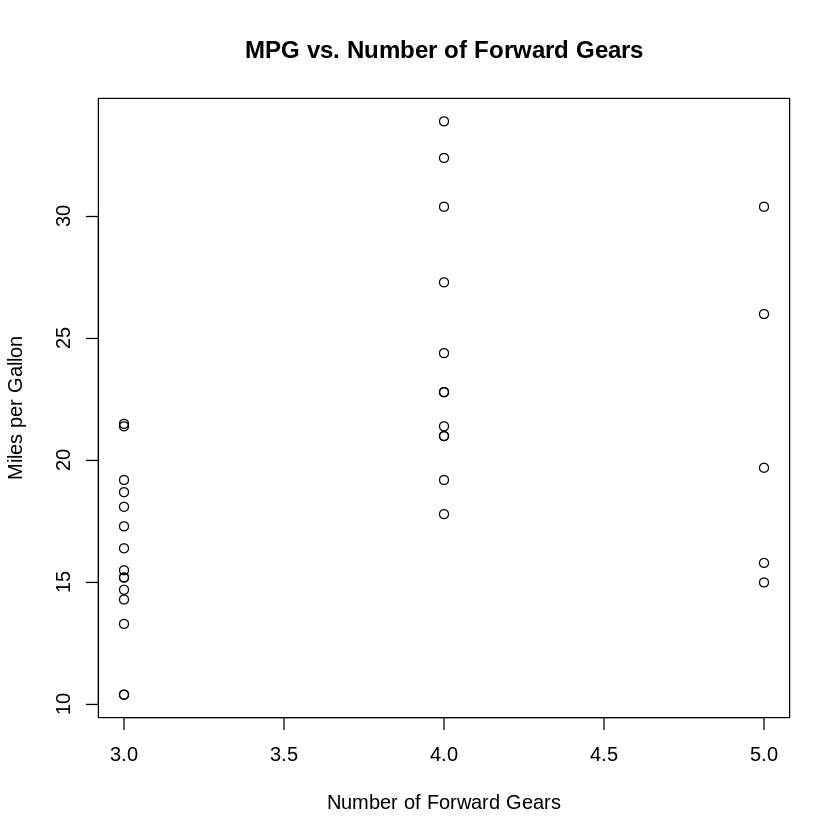

In [2]:
#1
mpg = mtcars$mpg #miles per gallon, response
gear = mtcars$gear #number of forward gears, perdictor
head(gear) #gear is categorical, use a box blot
mtcars$gear = factor(mtcars$gear)
plot(gear,mpg, xlab = "Number of Forward Gears", ylab = "Miles per Gallon", main = "MPG vs. Number of Forward Gears")

There seems to be a clear difference in mpg between vehicles with 3 forward gears and 4 forward gears. The difference between 3 and 5 and 4 and 5 is unclear as they both have overlaping mpg values


In [3]:
#2 Anova F Test is just a t-test with a single variable
fit = lm(mpg ~ gear, data = mtcars)
summary(fit)


Call:
lm(formula = mpg ~ gear, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7333 -3.2333 -0.9067  2.8483  9.3667 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   16.107      1.216  13.250 7.87e-14 ***
gear4          8.427      1.823   4.621 7.26e-05 ***
gear5          5.273      2.431   2.169   0.0384 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.708 on 29 degrees of freedom
Multiple R-squared:  0.4292,	Adjusted R-squared:  0.3898 
F-statistic:  10.9 on 2 and 29 DF,  p-value: 0.0002948


**Write down the regression model in symbolic form**

$$mpg = 16.107 + 8.427gear_{4} + 5.273*gear_{5}$$

**Write down the hypotheses of your F-test**

$$H_{0} : \beta_{gear_{4}} = \beta_{gear_{5}} = 0 $$
$$H_{a} : \text{at least one parameter} \neq 0 $$

**Write down the conclusion of your F-test in the context of the scenario**

$$\text{p-value} = .0002948 < .05$$
$\therefore \text{we reject the null. there is sufficient evidence to conclude that at least one parameter } \neq 0$

<br>

---

<br>






####<font color=red>Task 2</font>

1. If the F-test in Task 1 was significant, proceed to performing your pairwise t-tests that statistically compare each pair of levels in `gear`.

  To do so, we will use the `glht()` function within the `multcomp` package. First install and load the package using the following script
  ```
  install.packages("multcomp")
  library(multcomp)
  ```

2. Summarize your regression from Task 1 using `summary()`. From the summary, determine your three linear contrast functions that will compare the average `mpg` between each pair of `gear` levels.

  For example, the following script tests the contrast $E(\widehat{Y}_{mpg}|\text{gear4}) - E(\widehat{Y}_{mpg}|\text{gear3})$:
  ```
  K           <- matrix(c(0, 1, 0), 1)      # Defines linear contrast function
  rownames(K) <- "4 - 3"                    # For names in output
  cont1       <- glht(fit, linfct = K)      # Conducts test
  summary(cont1)                            # Summarizes test
  ```

3. Are all of the contrasts significant? Interpret each of the three contrasts in the context of miles per gallon and the number of forward gears.

In [5]:
#1 install and load packages
install.packages("multcomp")
library(multcomp)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘mvtnorm’, ‘TH.data’, ‘sandwich’


Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: ‘TH.data’


The following object is masked from ‘package:MASS’:

    geyser




In [7]:
#2
summary(fit)


Call:
lm(formula = mpg ~ gear, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.7333 -3.2333 -0.9067  2.8483  9.3667 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   16.107      1.216  13.250 7.87e-14 ***
gear4          8.427      1.823   4.621 7.26e-05 ***
gear5          5.273      2.431   2.169   0.0384 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.708 on 29 degrees of freedom
Multiple R-squared:  0.4292,	Adjusted R-squared:  0.3898 
F-statistic:  10.9 on 2 and 29 DF,  p-value: 0.0002948


**Linear Contrast Functions**

$$\beta_{1} - \beta_{0} = \begin{bmatrix} -1 & 1 & 0 \end{bmatrix} \begin{bmatrix} \beta_{0} \\ \beta_{1} \\ \beta_{2} \end{bmatrix}$$\
$$\beta_{2} - \beta_{1}= \begin{bmatrix} 0 & -1 & 1 \end{bmatrix} \begin{bmatrix} \beta_{0} \\ \beta_{1} \\ \beta_{2} \end{bmatrix}$$\
$$\beta_{2} - \beta_{0}= \begin{bmatrix} -1 & 0 & 1 \end{bmatrix} \begin{bmatrix} \beta_{0} \\ \beta_{1} \\ \beta_{2} \end{bmatrix}$$

In [8]:
#test1
LCF_1 = matrix(c(-1, 1, 0), 1)   #linear contrast function #1
rownames(LCF_1) = "1 - 0"
test1 =  glht(fit, linfct = LCF_1)
summary(test1)


	 Simultaneous Tests for General Linear Hypotheses

Fit: lm(formula = mpg ~ gear, data = mtcars)

Linear Hypotheses:
           Estimate Std. Error t value Pr(>|t|)   
1 - 0 == 0   -7.680      2.785  -2.757  0.00998 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


In [9]:
#test2
LCF_2 = matrix(c(0, -1, 1), 1)    # linear contrast function #2
rownames(LCF_2) <- "2 - 1"
test2 =  glht(fit, linfct = LCF_2)
summary(test2)


	 Simultaneous Tests for General Linear Hypotheses

Fit: lm(formula = mpg ~ gear, data = mtcars)

Linear Hypotheses:
           Estimate Std. Error t value Pr(>|t|)
2 - 1 == 0   -3.153      2.506  -1.258    0.218
(Adjusted p values reported -- single-step method)


In [10]:
#test3
LCF_3 = matrix(c(-1, 0, 1), 1)      # linear contrast function #3
rownames(LCF_3) <- "2 - 0"
test3 = glht(fit, linfct = LCF_2)
summary(test3)


	 Simultaneous Tests for General Linear Hypotheses

Fit: lm(formula = mpg ~ gear, data = mtcars)

Linear Hypotheses:
           Estimate Std. Error t value Pr(>|t|)
2 - 1 == 0   -3.153      2.506  -1.258    0.218
(Adjusted p values reported -- single-step method)


In [ ]:
#3

**1. Are all of the contrasts significant?**


$\beta_{1} - \beta_{0} \rightarrow \text{p-value}  = .00998 \rightarrow \text{significant} \checkmark $

$\beta_{2} - \beta_{1}\rightarrow \text{p-value} = .218 \rightarrow \text{Not Significant} \oslash$

$\beta_{2} - \beta_{0} \rightarrow \text{p-value} = .218 \rightarrow \text{Not Significant} \oslash$

These results are consistent with the box plot predictions I made at the beginning :)


**2. Interpret each of the three contrasts in the context of miles per gallon and the number of forward gears**

$\beta_{1} - \beta_{0} \rightarrow \text{The average difference in miles per gallon between vehicles with 3 and 4 forward gears }$

$\beta_{2} - \beta_{1}\rightarrow \text{The average difference in miles per gallon between vehicles with 4 and 5 forward gears}$

$\beta_{2} - \beta_{0} \rightarrow \text{The average difference in miles per gallon between vehicles with 3 and 5 forward gears}$

<br>

---

<br>






####<font color=red>Task 3</font>

1. From Task 2, what are the Bonferroni corrected p-values for the three contrasts? Did any of the contrasts change in their statistical significance? Explain why in the context of Type I error.

2. What are the Bonferroni corrected confidence intervals for the three contrasts? Calculate by hand (in R).

  Answers:
     * gear4 - gear3 = [3.79, 13.06]
     * gear5 - gear3 = [-0.90, 11.45]
     * gear5 - gear4 = [-9.52, 3.21]

3. There is an approach more efficient than Bonferroni using the `glht()` function that corrects for familywise error rate called Tukey all-comparisons. Run the following script to perform these pairwise comparisons.
```
tukey_compare <- glht(fit, linfct = mcp(gear = "Tukey"))
summary(tukey_compare)
```
  * Are the p-values smaller or larger than the p-values using Bonferroni correction?

4. Run the following scripts, which provides you with the confidence intervals for your contrasts. Note these are not corrected using the Bonferroni correction.
```
confint(cont1)          # from our contrast "by hand"
confint(tukey_compare)  # from our contrast using Tukey
```

In [ ]:
#1


**P-values before Bonferroni Correction**

$\beta_{1} - \beta_{0} \rightarrow \text{p-value}  = .00998$

$\beta_{2} - \beta_{1}\rightarrow \text{p-value} = .218$

$\beta_{2} - \beta_{0} \rightarrow \text{p-value} = .218$


**P-values After Bonferroni Correction**

$\beta_{1} - \beta_{0} \rightarrow \text{p-value}_{\text{corrected}}  = .00998*3 = .02994 \text{ still significant } \checkmark$

$\beta_{2} - \beta_{1}\rightarrow \text{p-value}_{\text{corrected}} = .218*3 = .654 \text{ still insignificant } \oslash $

$\beta_{2} - \beta_{0} \rightarrow \text{p-value}_{\text{corrected}} = .218*3 = .654 \text{ still insignificant } \oslash$

**Did any of the contrasts change in their statistical significance? Explain why in the context of Type I error.**

Without the correction, we tested each contrast at $\alpha = .05$, which means theres a 5% chance of making a type 1 error per test. With three contrasts, the probability of making a type 1 error is greater than 5%, and is actually 14%. The Bonferroni correction compensates by dividing $\alpha$ across the number of tests, which **reduces Type I error** but also makes it **harder to find significance**. This is why significance did not change for specifically $\beta_{2} - \beta_{1}$ and $\beta_{2} - \beta_{0}$ since they were already insignicant. Luckily $\beta_{1} - \beta_{0}$ had a small enough p-value prior to the correction, and it remained significant after the correction.


In [17]:
#2 What are the Bonferroni corrected confidence intervals for the three contrasts?
#gear4 - gear3 = [3.79, 13.06]
#gear5 - gear4 = [-9.52, 3.21]
#gear5 - gear3 = [-0.90, 11.45]

n = nrow(mtcars)
p = 3
B = qt(1 - 0.05/(2*p), df = n - p)

#gear4 - gear3 (1-0)
se1 = sqrt(vcov(fit)["gear4", "gear4"])
bhat_1 = coef(fit)["gear4"]
lower1 = bhat_1 - B*se1
upper1 = bhat_1 + B*se1
conf_int1 = c(lower1,upper1)
print(conf_int1)

#gear5 - gear4 (2-1)
se2 = sqrt(vcov(fit)["gear5", "gear5"] + (vcov(fit)["gear4", "gear4"]) - 2*(vcov(fit)["gear5", "gear4"]))
bhat_2 = coef(fit)["gear5"] - coef(fit)["gear4"]
lower2 = bhat_2 - B*se2
upper2 = bhat_2 + B*se2
conf_int2 = c(lower2,upper2)
print(conf_int2)

#gear5 - gear3 (2-0)
se3 = sqrt(vcov(fit)["gear5", "gear5"])
bhat_3 = coef(fit)["gear5"]
lower3 = bhat_3 - B*se3
upper3 = bhat_3 + B*se3
conf_int3 = c(lower3,upper3)
print(conf_int3)





    gear4     gear4 
 3.793532 13.059801 
    gear5     gear5 
-9.520967  3.214301 
    gear5     gear5 
-0.904179 11.450846 


In [18]:
#3
tukey_compare = glht(fit, linfct = mcp(gear = "Tukey"))
summary(tukey_compare)


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: lm(formula = mpg ~ gear, data = mtcars)

Linear Hypotheses:
           Estimate Std. Error t value Pr(>|t|)    
4 - 3 == 0    8.427      1.823   4.621   <0.001 ***
5 - 3 == 0    5.273      2.431   2.169   0.0918 .  
5 - 4 == 0   -3.153      2.506  -1.258   0.4257    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


**P-values Bonferroni**

$\beta_{1} - \beta_{0} \rightarrow \text{p-value}_{\text{Bonferroni}}  = .02994$

$\beta_{2} - \beta_{1}\rightarrow \text{p-value}_{\text{Bonferroni}} = .654$

$\beta_{2} - \beta_{0} \rightarrow \text{p-value}_{\text{Bonferroni}} = .654 $

**P-values Tukey**

$\beta_{1} - \beta_{0} \rightarrow \text{p-value}_{\text{Tukey}}  <.001$

$\beta_{2} - \beta_{1}\rightarrow \text{p-value}_{\text{Tukey}} = .4257$

$\beta_{2} - \beta_{0} \rightarrow \text{p-value}_{\text{Tukey}} = .0918 $


**Are the p-values smaller or larger than the p-values using Bonferroni correction?**
All p-values are smaller when using Tukey versus Bonferroni. $\beta_{1} - \beta_{0}$ is still the only significant one though.

In [19]:
#4
confint(test1)          # from our contrast "by hand"
confint(tukey_compare)  # from our contrast using Tukey


	 Simultaneous Confidence Intervals

Fit: lm(formula = mpg ~ gear, data = mtcars)

Quantile = 2.0452
95% family-wise confidence level
 

Linear Hypotheses:
           Estimate lwr      upr     
1 - 0 == 0  -7.6800 -13.3766  -1.9834



	 Simultaneous Confidence Intervals

Multiple Comparisons of Means: Tukey Contrasts


Fit: lm(formula = mpg ~ gear, data = mtcars)

Quantile = 2.4593
95% family-wise confidence level
 

Linear Hypotheses:
           Estimate lwr     upr    
4 - 3 == 0  8.4267   3.9424 12.9109
5 - 3 == 0  5.2733  -0.7057 11.2524
5 - 4 == 0 -3.1533  -9.3164  3.0097


In [20]:
confint(test2)          # from our contrast "by hand"
confint(tukey_compare)  # from our contrast using Tukey


	 Simultaneous Confidence Intervals

Fit: lm(formula = mpg ~ gear, data = mtcars)

Quantile = 2.0452
95% family-wise confidence level
 

Linear Hypotheses:
           Estimate lwr     upr    
2 - 1 == 0 -3.1533  -8.2788  1.9721



	 Simultaneous Confidence Intervals

Multiple Comparisons of Means: Tukey Contrasts


Fit: lm(formula = mpg ~ gear, data = mtcars)

Quantile = 2.4595
95% family-wise confidence level
 

Linear Hypotheses:
           Estimate lwr     upr    
4 - 3 == 0  8.4267   3.9420 12.9113
5 - 3 == 0  5.2733  -0.7062 11.2529
5 - 4 == 0 -3.1533  -9.3169  3.0102


In [21]:
confint(test3)          # from our contrast "by hand"
confint(tukey_compare)  # from our contrast using Tukey


	 Simultaneous Confidence Intervals

Fit: lm(formula = mpg ~ gear, data = mtcars)

Quantile = 2.0452
95% family-wise confidence level
 

Linear Hypotheses:
           Estimate lwr     upr    
2 - 1 == 0 -3.1533  -8.2788  1.9721



	 Simultaneous Confidence Intervals

Multiple Comparisons of Means: Tukey Contrasts


Fit: lm(formula = mpg ~ gear, data = mtcars)

Quantile = 2.4594
95% family-wise confidence level
 

Linear Hypotheses:
           Estimate lwr     upr    
4 - 3 == 0  8.4267   3.9422 12.9111
5 - 3 == 0  5.2733  -0.7059 11.2526
5 - 4 == 0 -3.1533  -9.3166  3.0100


<br>

---

<br>






####<font color=red>Task 4 - More contrasts practice</font>


1. Fit the following model and summarize your model fit.
```
# convert to factors
mtcars$cyl    <- as.factor(mtcars$cyl)
mtcars$gear   <- as.factor(mtcars$gear)
```
```
# fit regression model
fit <- lm(mpg ~ hp + disp + cyl + gear + hp:cyl + hp:gear, data = mtcars)
```

2. Based on the `summary()`, write the symbolic representation of the regression model above.

3. What is the average mpg for a vehicle that is
  * 8 cylinder vehicle, 150 horsepower, 200 displacement, 5 gears
  Hint: You can create a new dataset and use `predict()`.
  
  Answer: 24.35813

4. What is the average mpg for a vehicle that is
  * 6 cylinder vehicle, 100 horsepower, 80 displacement, 4 gears
  Hint: You can create a new dataset and use `predict()`.
  
  Answer: 26.23462

5. Using contrasts, what is the average difference in mpg between a
   * 8 cylinder vehicle, 150 horsepower, 200 displacement, 5 gears and a
   * 6 cylinder vehicle, 100 horsepower, 80 displacement, 4 gears

   Answer: -1.876

In [1]:
#1
mtcars$cyl = as.factor(mtcars$cyl)
mtcars$gear = as.factor(mtcars$gear)
fit = lm(mpg ~ hp + disp + cyl + gear + hp:cyl + hp:gear, data = mtcars)

In [2]:
#2
summary(fit)


Call:
lm(formula = mpg ~ hp + disp + cyl + gear + hp:cyl + hp:gear, 
    data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6170 -1.3370 -0.5120  0.7018  4.8288 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 18.67164   11.39406   1.639   0.1162  
hp           0.05497    0.10836   0.507   0.6172  
disp        -0.02319    0.01053  -2.203   0.0389 *
cyl6        16.85027   13.21661   1.275   0.2163  
cyl8         7.84385   11.85826   0.661   0.5155  
gear4       21.57003   10.85481   1.987   0.0601 .
gear5        8.47756    4.16245   2.037   0.0545 .
hp:cyl6     -0.14772    0.11779  -1.254   0.2236  
hp:cyl8     -0.07136    0.10776  -0.662   0.5150  
hp:gear4    -0.19727    0.09818  -2.009   0.0575 .
hp:gear5    -0.02359    0.02085  -1.131   0.2706  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.476 on 21 degrees of freedom
Multiple R-squared:  0.8857,	Adjusted R-squared:  0.8313 
F-statis

**Model**

$\hat y = 18.67164 + 0.05497*hp -0.02319*disp +16.85027*cyl_{6} +7.84385*cyl_{8} + 21.57003*gear_{4} + 8.47756*gear_{5} - 0.14772*hp*cyl_{6} - 0.07136*hp*cyl_{8} -0.19727*hp*gear_{4} - 0.02359*hp*gear_{5}$

In [11]:
#3 8 cylinder vehicle, 150 horsepower, 200 displacement, 5 gears
new_1= data.frame(hp = 150,disp=200,cyl = factor(8),gear = factor(5))
yhat_1 = predict(fit,newdata = new_1)
yhat_1

1 
24.35813

In [12]:
#4 6 cylinder vehicle, 100 horsepower, 80 displacement, 4 gears
new_2 = data.frame(hp = 100,disp=80,cyl = factor(6),gear = factor(4))
yhat_2 = predict(fit,newdata = new_2)
yhat_2

1 
26.23462

In [13]:
#5
yhat_1 - yhat_2

1 
-1.876489

<br>

---

<br>




